## Import libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

## Description of Data Fields per Documentation Accompanying the Data

N: Column: Description

1: AGE: age in years
2: GENDER: gender (1 = male; 0 = female)
3: CP: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
4: TRESTBPS: resting blood pressure (in mm Hg on admission to the hospital)
5: CHOL: serum cholestoral in mg/dl
6: FBS: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7: RESTECG: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8: THALACH: maximum heart rate achieved
9: EXANG: exercise induced angina (1 = yes; 0 = no)
10: OLDPEAK = ST depression induced by exercise relative to rest
11: SLOPE: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
12: CA: number of major vessels (0-3) colored by flourosopy
13: THAL: 3 = normal; 6 = fixed defect; 7 = reversable defect
14: NUM: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1,2,3,4: > 50% diameter narrowing
    presence (values 1,2,3,4) absence (value 0)

#Create a dictionary of value and label for each data field
age_dict = {"AGE":"Age"}
gender_dict = {"GENDER":"Gender", 0:"female", 1:"male"}
cp_dict = {"CP":"Chest Pain", 1:"typical", 2:"atypical", 3:"Non-anginal", 4:"Asymptomatic"}
trestbps_dict = {"TESTBPS":"Resting Blood Pressure (mm Hg)"}
chol_dict = {"CHOL":"Serum Cholestoral (mg/dl)"}
fbs_dict = {"FBS":"Fasting Blood Sugar", 0:"<=120 (mg/dl)", 1:">120 (mg/dl)"}
restecg_dict = {"RESTECG":"Resting ECG Results",0:"normal",1:"ST-T Wave Abnor",2:"Estes"}
thalach_dict = {"THALACH":"max heart rate"}
exang_dict = {"EXANG":"Exercise Induced Angina", 0:"no", 1:"yes"}
oldpeak_dict = {"OLDPEAK":"ST Depression Induced by "}

## Read in and assign data types based on descriptions

In [2]:
col_names = ["AGE", "GENDER", "CP", "TRESTBPS", "CHOL", "FBS", "RESTECG", "THALACH", "EXANG", "OLDPEAK", "SLOPE", "CA", "THAL", "NUM"]
col_types = {"AGE": np.float_, "GENDER": np.int_ , "CP": np.int_, "TRESTBPS": np.float_, "CHOL": np.float_,
             "FBS": np.int_, "RESTECG": np.int_, "THALACH": np.float_, "EXANG": np.int_, "OLDPEAK": np.float_,
             "SLOPE": np.int_, "CA": np.int_, "THAL": np.int_, "NUM": np.int_}
health_data = pd.read_csv("Data/processed.cleveland.data", names = col_names)
print(health_data.values)

[[63.0 1.0 1.0 ..., '0.0' '6.0' 0]
 [67.0 1.0 4.0 ..., '3.0' '3.0' 2]
 [67.0 1.0 4.0 ..., '2.0' '7.0' 1]
 ..., 
 [57.0 1.0 4.0 ..., '1.0' '7.0' 3]
 [57.0 0.0 2.0 ..., '1.0' '3.0' 1]
 [38.0 1.0 3.0 ..., '?' '3.0' 0]]


In [3]:
for name in col_names:
    data_type = col_types[name]
    print(name+":", health_data[name].dtype)
    

AGE: float64
GENDER: float64
CP: float64
TRESTBPS: float64
CHOL: float64
FBS: float64
RESTECG: float64
THALACH: float64
EXANG: float64
OLDPEAK: float64
SLOPE: float64
CA: object
THAL: object
NUM: int64


In [4]:
print("CA")
print(health_data.CA.value_counts())
print("THAL")
print(health_data.THAL.value_counts())

CA
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: CA, dtype: int64
THAL
3.0    166
7.0    117
6.0     18
?        2
Name: THAL, dtype: int64


In [5]:
health_data.loc[health_data.CA == "?", "CA"] = "-1"

In [6]:
health_data.loc[health_data.THAL == "?", "THAL"] = "-1"

In [7]:
print("CA")
print(health_data.CA.value_counts())
print("THAL")
print(health_data.THAL.value_counts())

CA
0.0    176
1.0     65
2.0     38
3.0     20
-1       4
Name: CA, dtype: int64
THAL
3.0    166
7.0    117
6.0     18
-1       2
Name: THAL, dtype: int64


In [8]:
health_data.values

array([[63.0, 1.0, 1.0, ..., '0.0', '6.0', 0],
       [67.0, 1.0, 4.0, ..., '3.0', '3.0', 2],
       [67.0, 1.0, 4.0, ..., '2.0', '7.0', 1],
       ..., 
       [57.0, 1.0, 4.0, ..., '1.0', '7.0', 3],
       [57.0, 0.0, 2.0, ..., '1.0', '3.0', 1],
       [38.0, 1.0, 3.0, ..., '-1', '3.0', 0]], dtype=object)

In [9]:
for name in col_names:
    data_type = col_types[name]
    print(name+":", health_data[name].dtype)

AGE: float64
GENDER: float64
CP: float64
TRESTBPS: float64
CHOL: float64
FBS: float64
RESTECG: float64
THALACH: float64
EXANG: float64
OLDPEAK: float64
SLOPE: float64
CA: object
THAL: object
NUM: int64


In [10]:
health_data.CA = health_data.CA.astype(np.float_)
health_data.THAL = health_data.THAL.astype(np.float_)
health_data = health_data.astype(col_types)
health_data.dtypes

AGE         float64
GENDER        int64
CP            int64
TRESTBPS    float64
CHOL        float64
FBS           int64
RESTECG       int64
THALACH     float64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA            int64
THAL          int64
NUM           int64
dtype: object

In [11]:
health_data.values

array([[ 63.,   1.,   1., ...,   0.,   6.,   0.],
       [ 67.,   1.,   4., ...,   3.,   3.,   2.],
       [ 67.,   1.,   4., ...,   2.,   7.,   1.],
       ..., 
       [ 57.,   1.,   4., ...,   1.,   7.,   3.],
       [ 57.,   0.,   2., ...,   1.,   3.,   1.],
       [ 38.,   1.,   3., ...,  -1.,   3.,   0.]])

In [12]:
## Check distributions of data fields
#floating point variables - min, 25 quantile, 50, 75, max
#integers frequency count
#col_types = {"AGE": np.float_, "GENDER": np.int_ , "CP": np.int_, "TRESTBPS": np.float_, "CHOL": np.float_,
#             "FBS": np.int_, "RESTECG": np.int_, "THALACH": np.float_, "EXANG": np.int_, "OLDPEAK": np.float_,
#             "SLOPE": np.int_, "CA": np.int_, "THAL": np.int_, "NUM": np.int_}
print("Field: \t Min: \t 10th: \t 25th: \t 50th: \t 75th: \t 90th: \t Max:")
s1 = health_data.AGE
q = s1.quantile([0.10, 0.25, 0.50, 0.75, 0.90])
print("AGE \t {0:<5.2f} \t {1:<5.2f} \t {2:<5.2f} \t {3:<5.2f} \t {4:<5.2f} \t {5:<5.2f} \t {6:<5.2f}".format(
    s1.min(), q.iloc[0], q.iloc[1], q.iloc[2], q.iloc[3], q.iloc[4], s1.max()))
s1 = health_data.TRESTBPS
q = s1.quantile([0.10, 0.25, 0.50, 0.75, 0.90])
print("TRESTBPS {0:<5.2f} \t {1:<5.2f}  {2:<5.2f}  {3:<5.2f}  {4:<5.2f}  {5:<5.2f}  {6:<5.2f}".format(
    s1.min(), q.iloc[0], q.iloc[1], q.iloc[2], q.iloc[3], q.iloc[4], s1.max()))
s1 = health_data.CHOL
q = s1.quantile([0.10, 0.25, 0.50, 0.75, 0.90])
print("CHOL \t {0:<5.2f}  {1:<5.2f}  {2:<5.2f}  {3:<5.2f}  {4:<5.2f}  {5:<5.2f}  {6:<5.2f}".format(
    s1.min(), q.iloc[0], q.iloc[1], q.iloc[2], q.iloc[3], q.iloc[4], s1.max()))
s1 = health_data.THALACH
q = s1.quantile([0.10, 0.25, 0.50, 0.75, 0.90])
print("THALACH  {0:<5.2f} \t {1:<5.2f}  {2:<5.2f}  {3:<5.2f}  {4:<5.2f}  {5:<5.2f}  {6:<5.2f}".format(
    s1.min(), q.iloc[0], q.iloc[1], q.iloc[2], q.iloc[3], q.iloc[4], s1.max()))
s1 = health_data.OLDPEAK
q = s1.quantile([0.10, 0.25, 0.50, 0.75, 0.90])
print("OLDPEAK  {0:<5.2f} \t {1:<5.2f}  {2:<5.2f}  {3:<5.2f}  {4:<5.2f}  {5:<5.2f}  {6:<5.2f}".format(
    s1.min(), q.iloc[0], q.iloc[1], q.iloc[2], q.iloc[3], q.iloc[4], s1.max()))

Field: 	 Min: 	 10th: 	 25th: 	 50th: 	 75th: 	 90th: 	 Max:
AGE 	 29.00 	 42.00 	 48.00 	 56.00 	 61.00 	 66.00 	 77.00
TRESTBPS 94.00 	 110.00  120.00  130.00  140.00  152.00  200.00
CHOL 	 126.00  188.80  211.00  241.00  275.00  308.80  564.00
THALACH  71.00 	 116.00  133.50  153.00  166.00  176.60  202.00
OLDPEAK  0.00  	 0.00   0.00   0.80   1.60   2.80   6.20 


In [13]:
print(health_data.GENDER.value_counts())
print(health_data.CP.value_counts())
print(health_data.FBS.value_counts())
print(health_data.RESTECG.value_counts())
print(health_data.EXANG.value_counts())
print(health_data.SLOPE.value_counts())
print(health_data.CA.value_counts())
print(health_data.THAL.value_counts())
print(health_data.NUM.value_counts())

1    206
0     97
Name: GENDER, dtype: int64
4    144
3     86
2     50
1     23
Name: CP, dtype: int64
0    258
1     45
Name: FBS, dtype: int64
0    151
2    148
1      4
Name: RESTECG, dtype: int64
0    204
1     99
Name: EXANG, dtype: int64
1    142
2    140
3     21
Name: SLOPE, dtype: int64
 0    176
 1     65
 2     38
 3     20
-1      4
Name: CA, dtype: int64
 3    166
 7    117
 6     18
-1      2
Name: THAL, dtype: int64
0    164
1     55
2     36
3     35
4     13
Name: NUM, dtype: int64


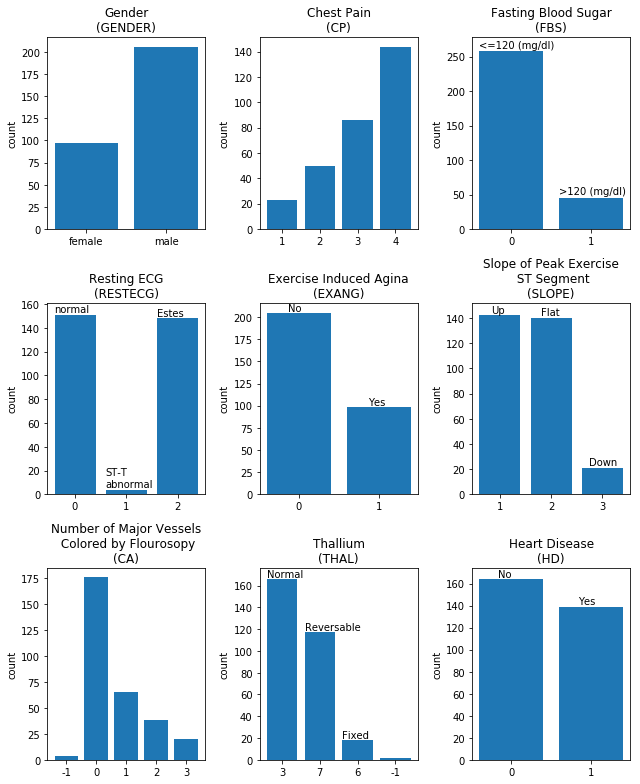

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_size_inches(9, 11)

#GENDER
var ="GENDER"
ind = health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[0,0].set_xticks(ind)
axes[0,0].bar(ind, count)
axes[0,0].set_title("Gender\n(GENDER)")
axes[0,0].set_ylabel("count")
axes[0,0].set_xticklabels(("male","female"))

#CP
var ="CP"
ind = health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[0,1].set_xticks(ind)
axes[0,1].bar(ind, count)
axes[0,1].set_title("Chest Pain\n(CP)")
axes[0,1].set_ylabel("count")
axes[0,1].set_xticklabels([4,3,2,1])

#FBS
#FBS: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
var ="FBS"
ind = health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[0,2].set_xticks(ind)
rect = axes[0,2].bar(ind, count)
axes[0,2].set_title("Fasting Blood Sugar\n(FBS)")
axes[0,2].set_ylabel("count")
axes[0,2].set_ylim(0, max(count) + 20)
axes[0,2].set_xticklabels(ind)
axes[0,2].text(ind[0]-rect[0].get_width()/2, count[0] + 5,"<=120 (mg/dl)")
axes[0,2].text(ind[1]-rect[1].get_width()/2, count[1] + 5,">120 (mg/dl)")

#RESTECG
#    -- Value 0: normal
#    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
var ="RESTECG"
ind = health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[1,0].set_xticks(ind)
rect = axes[1,0].bar(ind, count)
axes[1,0].set_title("Resting ECG\n(RESTECG)")
axes[1,0].set_ylabel("count")
axes[1,0].set_ylim(0, max(count) + 10)
axes[1,0].set_xticklabels(ind)
axes[1,0].text(ind[0]-rect[0].get_width()/2, count[0] + 2,"normal")
axes[1,0].text(ind[1]-rect[1].get_width()/2, count[1] + 2,"Estes")
axes[1,0].text(ind[2]-rect[2].get_width()/2, count[2] + 2,"ST-T\nabnormal")

#EXANG
var ="EXANG"
ind = health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[1,1].set_xticks(ind)
rect = axes[1,1].bar(ind, count)
axes[1,1].set_title("Exercise Induced Agina\n(EXANG)")
axes[1,1].set_ylabel("count")
axes[1,1].set_ylim(0, max(count) + 12)
axes[1,1].set_xticklabels(ind)
axes[1,1].text(ind[0]-rect[0].get_width()/6, count[0] + 2,"No")
axes[1,1].text(ind[1]-rect[1].get_width()/6, count[1] + 2,"Yes")

#SLOPE
var ="SLOPE"
ind = health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[1,2].set_xticks(ind)
rect = axes[1,2].bar(ind, count)
axes[1,2].set_title("Slope of Peak Exercise\n ST Segment\n(SLOPE)")
axes[1,2].set_ylabel("count")
axes[1,2].set_ylim(0, max(count) + 10)
axes[1,2].set_xticklabels(ind)
axes[1,2].text(ind[0]-rect[0].get_width()/5, count[0] + 2,"Up")
axes[1,2].text(ind[1]-rect[1].get_width()/4, count[1] + 2,"Flat")
axes[1,2].text(ind[2]-rect[2].get_width()/3, count[2] + 2,"Down")

#CA
var ="CA"
ind = health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[2,0].set_xticks(ind)
rect = axes[2,0].bar(ind, count)
axes[2,0].set_title("Number of Major Vessels\n Colored by Flourosopy\n(CA)")
axes[2,0].set_ylabel("count")
axes[2,0].set_xticklabels(ind)

#THAL
#THAL: 3 = normal; 6 = fixed defect; 7 = reversable defect
var ="THAL"
ind = np.arange(4) #health_data.loc[:,var].value_counts().index.values
count = health_data.loc[:,var].value_counts().values
axes[2,1].set_xticks(ind)
rect = axes[2,1].bar(ind, count)
axes[2,1].set_title("Thallium\n(THAL)")
axes[2,1].set_ylabel("count")
axes[2,1].set_ylim(0, max(count) + 10)
axes[2,1].set_xticklabels([3,7,6,-1])
axes[2,1].text(ind[0] - rect[0].get_width()/2, count[0] + 2,"Normal")
axes[2,1].text(ind[1] - rect[1].get_width()/2, count[1] + 2,"Reversable")
axes[2,1].text(ind[2] - rect[2].get_width()/2, count[2] + 2,"Fixed")

#HD
HD = (health_data.loc[: ,"NUM"] >= 1).astype(np.int_)
ind = HD.value_counts().index.values
count = HD.value_counts().values
axes[2,2].set_xticks(ind)
rect = axes[2,2].bar(ind, count)
axes[2,2].set_title("Heart Disease\n(HD)")
axes[2,2].set_ylabel("count")
axes[2,2].set_ylim(0, max(count) + 10)
axes[2,2].set_xticklabels(ind)
axes[2,2].text(ind[0] - rect[0].get_width()/5, count[0] + 2,"No")
axes[2,2].text(ind[1] - rect[1].get_width()/5, count[1] + 2,"Yes")

plt.tight_layout()
plt.show()

## Exploratory Data Analysis

In [15]:
HD = (health_data.loc[: ,"NUM"] >= 1).astype(np.int_)
health_data = health_data.assign(HD = HD)

In [16]:
#Q1. How well does chest pain predict heart disease
pd.crosstab(health_data.loc[:,"HD"],health_data.loc[:,"CP"], margins = True).T

HD,0,1,All
CP,,,
1,16,7,23
2,41,9,50
3,68,18,86
4,39,105,144
All,164,139,303


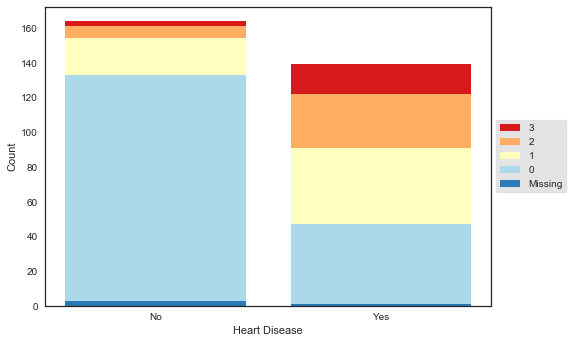

In [238]:
#Q2. How well does flouroscopy test predict heart disease
d = pd.crosstab(health_data.loc[:,"HD"],health_data.loc[:,"CA"]).T.cumsum()
fig = plt.figure()
ax = fig.add_subplot(111)
rect4 = ax.bar([0,1], d.iloc[4,:], color = "#d7191c")
rect3 = ax.bar([0,1], d.iloc[3,:], color = "#fdae61")
rect2 = ax.bar([0,1], d.iloc[2,:], color = "#ffffbf")
rect1 = ax.bar([0,1], d.iloc[1,:], color = "#abd9e9")
rect0 = ax.bar([0,1], d.iloc[0,:], color = "#2c7bb6")
ax.legend([rect4,rect3,rect2,rect1,rect0],[3,2,1,0,"Missing"], loc='center left', bbox_to_anchor=(1.0, 0.5),
         facecolor = "#dddddd", frameon = True)
ax.set_xticks([0,1])
ax.set_xticklabels(["No","Yes"])
ax.set(xlabel="Heart Disease", ylabel="Count")
plt.show()


#### Q3. How similar are the discrete variables?
Use Cramer's V formula to answer this, which is the chi-square statistic normalized to be between 0 and 1

$\chi^2 = N \cdot \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(p_{ij} - p_i p_j)^2}{p_i p_j}$

$V = \sqrt{\frac{\chi^2}{N \cdot \min(r-1,c-1)}}$

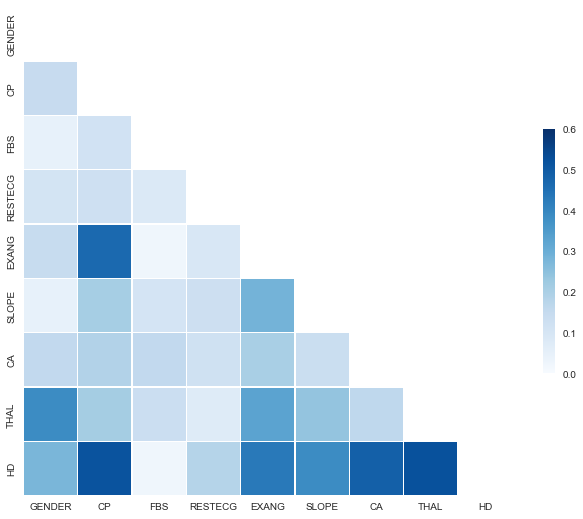

In [352]:
#Q3. How similar are the discrete variables
#Use Cramer's V to explore this
#For each combination of discrete variables first calculate X^2 statistic and Cramer's V
#Store results in an numpy array
discrete_vars = health_data.iloc[:, np.array(health_data.dtypes == np.int_) & np.array(health_data.columns != "NUM")]
num_obs = discrete_vars.shape[0]
num_vars = discrete_vars.shape[1]

#create dataframe with correlations
corr = pd.DataFrame(np.zeros((num_vars,num_vars)), discrete_vars.columns, discrete_vars.columns) 
corr.values[[np.arange(num_vars)]*2] = 1.0

#intialize matrices
#chi_stat = np.zeros(np.int_(num_vars * (num_vars - 1) / 2))
#chi_stat = np.zeros((num_vars,num_vars))
#v_stat = np.zeros(np.int_(num_vars * (num_vars - 1) / 2))
#chi_stat = np.zeros((num_vars,num_vars))

for i in range(0, num_vars):
    for j in range(i + 1, num_vars):
        #calc contingency table
        var1 = discrete_vars.columns[i]
        var2 = discrete_vars.columns[j]
        cnts = pd.crosstab(discrete_vars.loc[:,var1], discrete_vars.loc[:,var2], margins = True).values
        #calc cramers v
        probs = cnts / cnts[cnts.shape[0] - 1, cnts.shape[1] - 1]
        probs_joint = probs[0:-1,0:-1]
        probs_ind = np.outer(probs[0:-1,-1],probs[-1,0:-1])
        chi_stat = num_obs * np.sum((probs_joint - probs_ind)**2 / probs_ind)
        v_stat = np.sqrt(chi_stat / (num_obs * min(probs_joint.shape[0]-1,probs_joint.shape[1]-1)))
        #add correlation to corr dataframe
        corr.loc[var2,var1] = v_stat
        corr.loc[var1,var2] = v_stat
        
#graph results using a correlation matrix plot
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap=plt.get_cmap("Blues")

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, vmin=0, vmax=0.6, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#ax.set_yticks(ax.get_xticks())
labs = corr.columns.get_values().tolist()
labs.reverse()
ax.set_yticklabels(labs,va="center")
plt.show()

In [353]:
corr

,GENDER,CP,FBS,RESTECG,EXANG,SLOPE,CA,THAL,HD
GENDER,1.000000,0.149713,0.047862,0.108775,0.146201,0.048993,0.158741,0.389017,0.276816
CP,0.149713,1.000000,0.115849,0.126176,0.466745,0.210142,0.187993,0.211384,0.519634
FBS,0.047862,0.115849,1.000000,0.084737,0.025665,0.105514,0.158885,0.135242,0.025264
RESTECG,0.108775,0.126176,0.084737,1.000000,0.094973,0.130692,0.122034,0.075021,0.182136
EXANG,0.146201,0.466745,0.025665,0.094973,1.000000,0.287995,0.205138,0.329812,0.431894
SLOPE,0.048993,0.210142,0.105514,0.130692,0.287995,1.000000,0.137345,0.241295,0.388721
CA,0.158741,0.187993,0.158885,0.122034,0.205138,0.137345,1.000000,0.162585,0.489557
THAL,0.389017,0.211384,0.135242,0.075021,0.329812,0.241295,0.162585,1.000000,0.524312
HD,0.276816,0.519634,0.025264,0.182136,0.431894,0.388721,0.489557,0.524312,1.000000


In [ ]:


For integer variables, create frequency tables.

For floating point variables, look at max, min, range, histogram, correlation plot 

In [ ]:
for name in health_data.columns:
    if health_data[name].dtype == np.int_:
        print(health_data[name].value_counts())

In [ ]:
health_data.describe()

In [ ]:
#histogram
fig, ax = plt.subplots()
ax.hist(health_data["AGE"].values)
plt.show()

Choose 2 or 3 floating point variables. Build classification model. Add more columns. Isolate which columns are the best predictors of NUM. Naives Bayes. Classification Tree/Random Forest. Baseline model. 70/30 train/test split. Scikit-learn. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#examples-using-sklearn-naive-bayes-gaussiannb, clf = GaussianNB(), fit, score, X_train, Y_train, X_test, Y_test, clf.fit(X_train, Y_train), clf.predict(X_test), %time / %timeit, Excel file of time(fit, ), time(score), accuracy, F-score

In [ ]:
#### Modeling

# Feature Engineering
# Create HD, binary version of NUM. Bin AGE and TRESTBPS into five bins. Create binary versions of variables
HD = (health_data.loc[: ,"NUM"] >= 1).astype(np.int_) #0 = no heart disease; 1 = heart disease
health_data = health_data.assign(HD = HD)

age_bins = health_data.loc[:,"AGE"].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
age_bins.iloc[3] = 57.9 # Results in a more even distribution of observations into the bins
AGEBIN = pd.cut(health_data.loc[:,"AGE"], age_bins, labels = [1,2,3,4,5], include_lowest = True)
health_data = health_data.assign(AGEBIN = np.int_(AGEBIN))

trestbps_bins = health_data.loc[:,"TRESTBPS"].quantile([0.0, 0.19, 0.39, 0.59, 0.79, 1.0], interpolation = "lower")
TRESTBPSBIN = pd.cut(health_data.loc[:,"TRESTBPS"], trestbps_bins, labels = [1,2,3,4,5], include_lowest = True)
health_data = health_data.assign(TRESTBPSBIN = np.int_(TRESTBPSBIN))

health_data_bin = pd.get_dummies(health_data, columns = ["GENDER", "AGEBIN", "TRESTBPSBIN", "CP"])

health_data.head()

In [ ]:
# 70/30 train/test split
# Stratified random sample by heart disease class, equal proportion
health_data_0 = health_data_bin.loc[health_data.loc[:,"HD"] == 0,:] #patients without heart disease
health_data_1 = health_data_bin.loc[health_data.loc[:,"HD"] == 1,:] #patients with heart disease
r_seed = 7
train_data = health_data_0.sample(frac = 0.7, random_state = r_seed)
train_data = train_data.append(health_data_1.sample(frac = 0.7, random_state = r_seed))
test_index = health_data_bin.index.difference(train_data.index)
test_data = health_data_bin.iloc[test_index]

In [ ]:
print(train_data.loc[:,"HD"].value_counts())
print(test_data.loc[:,"HD"].value_counts())

In [ ]:
## Baseline Binary Classifier Model - Navies Bayes Model
# Predictor Vars = AGE, GENDER, CP, TRESTBPS - A doctor can collect these variables during an office vist
# Navie Bayes Model
import sklearn.naive_bayes as nb
X = train_data.filter(regex = r"GENDER|CP|AGEBIN|TRESTBPSBIN")
Y = train_data.loc[:,"HD"]
clf_nb = nb.BernoulliNB()
clf_nb.fit(X, Y)

In [ ]:
#Record probability that HD = 1 for each training observation and classifier 
train_classes_out = pd.DataFrame(columns = ["THRESHOLD","ID","ACTUAL",
                                            "NBPROB","NBCLASS",
                                            "LOGITPROB","LOGITCLASS",
                                            "TREEPROB","TREECLASS",
                                            "FORESTPROB","FORESTCLASS"])
thresholds = np.arange(101)/100
train_classes_out.loc[:,"THRESHOLD"] = np.repeat(thresholds, train_data.shape[0])
train_classes_out.loc[:,"ID"] = np.tile(train_data.index.values, thresholds.shape[0])
train_classes_out.loc[:,"ACTUAL"] = np.tile(Y.values, thresholds.shape[0])

#Naive Bayes
train_classes_out.loc[:,"NBPROB"] = np.tile(clf_nb.predict_proba(X)[:,1], thresholds.shape[0])
train_classes_out.loc[:,"NBCLASS"] = (train_classes_out.loc[:, "NBPROB"] >= train_classes_out.loc[:, "THRESHOLD"]).astype(np.int_)

In [ ]:
train_classes_out.iloc[7689:7760,:]

In [ ]:
#### Output statistics and graphs
#Save number of true positives, false negatives, false positives and true negatives
#Accuracy, Precision, Recall, F-score, true positive rate, false positive rate, mutual information
#Create ROC curve

from sklearn import metrics

#Naive Bayes
model = "NBCLASS"
nb_stats = pd.DataFrame(columns = ["THRESHOLD","ACCURACY","PRECISION","RECALL","FSCORE","TPRATE","FPRATE","MI"], dtype = np.float_)
for threshold in thresholds:
    rows = (train_classes_out.loc[:,"THRESHOLD"] == threshold)
    act = train_classes_out.loc[rows,"ACTUAL"]
    pred = train_classes_out.loc[rows,model]
    tot = act.shape[0]
    tp = sum((act == 1) & (pred == 1))
    fp = sum((act == 0) & (pred == 1))
    fn = sum((act == 1) & (pred == 0))
    tn = sum((act == 0) & (pred == 0))
    acc = (tp + tn)/tot
    if tp + fp == 0:
        pre = np.nan
    else:
        pre = tp/(tp + fp)
    
    tpr = rec = tp/(tp + fn)
    fsc = (2 * pre * rec)/(pre + rec)
    fpr = fp/(fp + tn)
    mi = metrics.mutual_info_score(act, pred)
    
    nb_stats = nb_stats.append({"THRESHOLD": threshold,
                     "ACCURACY": acc,
                     "PRECISION": pre,
                     "RECALL": rec,
                     "FSCORE": fsc,
                     "TPRATE": tpr,
                     "FPRATE": fpr,
                     "MI": mi}, ignore_index = True)  

In [ ]:
nb_stats.iloc[50,:]

In [ ]:
# Test set
X = test_data.filter(regex = r"GENDER|CP|AGEBIN|TRESTBPSBIN")
Y = test_data.loc[:,"HD"]
clf_nb.predict(X)

import timeit

start = timeit.timeit()
for i in range(10):
    print("hello")
end = timeit.timeit()
print(end - start)

In [ ]:
test_data.shape

In [ ]:
p00 = 85/212; p01 = 21/212; p10 = 30/212; p11 = 76/212;
p_0 = 115/212; p_1 = 97/212; p0_ = 106/212; p1_ = 106/212;
p00 * np.log(p00/(p_0 * p0_)) + p01 * np.log(p01/(p0_ * p_1)) + p10 * np.log(p10/(p_0 * p1_)) + p11 * np.log(p11/(p_1 * p1_))

In [ ]:
pd.crosstab(pred,act, margins = True)

In [ ]:
#Plot histograms of AGE and TRESTBPS
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

In [ ]:
ax1.hist(X_cont.AGE.values)
ax2.hist(X_cont.TRESTBPS.values, bins = 10)
plt.show()

In [ ]:
import sklearn.naive_bayes as nb
clf_cont = nb.GaussianNB()
clf_disc = nb.MultinomialNB()
clf_cont.fit(X_cont, Y)
clf_disc.fit(X_disc, Y)

In [ ]:
#Class probabilities and predictions
clf_disc.predict(X_disc)

In [ ]:
clf_disc.get_params()

In [ ]:
np.exp(clf.class_log_prior_)

In [ ]:
X = np.int_([[0,1],[1,0],[0,1],[0,0],[1,0],[1,1],[0,1],[0,1]])
Y = np.array([0, 0, 1, 1, 1, 1,1,1])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
print(clf.predict([[1, 1]]))
print(np.exp(clf.class_log_prior_))
print(clf.class_count_)
print(clf.feature_count_)
print(clf.alpha)
print(np.exp(clf.feature_log_prob_))

In [ ]:
train_data.iloc[0:4,]

In [ ]:
a = pd.get_dummies(train_data.iloc[0:4,], columns = ["AGE"])
a

In [ ]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
>>> from sklearn.naive_bayes import MultinomialNB
>>> clf = MultinomialNB()
>>> clf.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
>>> print(clf.predict(X[2:3]))

In [ ]:
#Report
#1. What is the most important metric? accuracy, precision or recall. tradeoff
#2. For each model, output accuracy, precision and recall, time to train, time to split
#3. I did this and then went to this, what is the story? Baseline model = simplest and cheapest
# most advance model = random forest - complex and all the variables and most expensive, models in between
#4. 3 to 5 lines about each model work.
#5. roc curves
#6. exploratory analysis - histogram of age and gender, cost of these tests and individual acc,pre,rec